## Advanced Regression - Assignment

### Hourse Price Prediction

## Problem Statement
<p>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.
</p>

## Business Goal

<p>Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.</p>

## Problem Solving Approach

# Part-1
- Import Data file and Analyze Data
- Exploratory Data Analysis
- Binary Data Conversion, Data Type Correction, Dummy Variable Creation
- Model Training
- Model Prediction
- Model Evaluation

# Part-2
- Redge and Lasso Regularization
- Obervations & Summary

## Let's Start

### 1- Import Required Standard Libraries

In [235]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings

### 2- Reading Data from csv

In [238]:
df_housingData = pd.read_csv("/home/a67b6b32-f797-4735-ba07-1fbb1bf9483f/AI-ML/Advanced Regression/Graded Assignment/House-Price-Prediction/data/train.csv")
df_housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [240]:
df_housingData.shape

(1460, 81)

In [242]:
df_housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [244]:
df_housingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking Duplicate Rows

In [247]:
df_housingData.duplicated().sum()

0

### Observation 1 : Dataset is having No Duplicate Row - ZERO Duplicate

### Checking Rows for NULL Values

In [251]:
df_housingData.isnull().all(axis=1).sum()

0

### Checking Columns for NULL Values

In [254]:
df_housingData.isnull().all(axis=0).sum()

0

In [256]:
#Percentage of NUll Values in the Train DataSet
pd.set_option('display.max_rows', None)
100*df_housingData.isnull().mean().sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

### Below Data Columns is having high number of NUL Values so removing these columns
- PoolQC           ---- 99.520548
- MiscFeature      ---- 96.301370
- Alley            ---- 93.767123
- Fence            ---- 80.753425
- MasVnrType       ---- 59.726027
- FireplaceQu      ---- 47.260274

In [259]:
## Removing above columns
df_housingData.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [261]:
df_housingData.shape

(1460, 75)

In [263]:
## As per Data Dictionary NA value repsent that value not present. Replacing it with None
column_list = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for column_i in column_list:
    df_housingData[column_i].fillna("none", inplace=True)

In [265]:
#Replacing null values with median for LotFrontage, GarageYrBlt and MasVnrArea
df_housingData["GarageYrBlt"].fillna(df_housingData["GarageYrBlt"].median(), inplace=True)
df_housingData["LotFrontage"].fillna(df_housingData["LotFrontage"].median(), inplace=True)
df_housingData["MasVnrArea"].fillna(df_housingData["MasVnrArea"].median(), inplace=True)

In [267]:
# Filling the Electrical with the mode
df_housingData['Electrical'] = df_housingData['Electrical'].fillna(df_housingData['Electrical'].mode()[0])

In [269]:
## ID Column is just the Uniqe identifier for rows. It won't add any value for Model preparation. We are removing it.

df_housingData=df_housingData.drop('Id',axis='columns')

In [271]:
#Let's check Null Value
100*df_housingData.isnull().mean().sort_values(ascending=False)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

In [273]:
df_housingData = df_housingData.round(decimals = 2)

## Derived Columns

In [276]:
#Total Area
df_housingData['Total_Area_sqft'] = (df_housingData['BsmtFinSF1'] + df_housingData['BsmtFinSF2'] + df_housingData['1stFlrSF'] + df_housingData['2ndFlrSF'])
# No of Bathrooms
df_housingData['No_Of_Bathrooms'] = (df_housingData['FullBath'] + (0.5 * df_housingData['HalfBath']) + df_housingData['BsmtFullBath'] + (0.5 * df_housingData['BsmtHalfBath']))
#Porch Area
df_housingData['Porch_Area_sqft'] = (df_housingData['OpenPorchSF'] + df_housingData['3SsnPorch'] + df_housingData['EnclosedPorch'] + df_housingData['ScreenPorch'] + df_housingData['WoodDeckSF'])

## Dropping Column

In [279]:
## As we have created derived columns so columns which we used to create dervied column is of no use and create duplicity only.
## We are recoming these columns
Columns_to_Remove = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
df_housingData.drop(Columns_to_Remove,axis=1,inplace=True)

In [281]:
for Column_i in df_housingData.columns :
    print("Column Name : ")
    print(df_housingData[Column_i].value_counts(),"\n")

Column Name : 
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64 

Column Name : 
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 

Column Name : 
LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
24.0      19
68.0      19
64.0      19
73.0      18
55.0      17
63.0      17
72.0      17
79.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
43.0      12
67.0      12
40.0      12
57.0      12
76.0      11
34.0      10
53.0      10
86.0      10
92.0      10
88.0      10
44.0       9
84.0       9
35.0       9
62.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       

In [282]:
df_housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   int64  
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   LotShape         1460 non-null   object 
 6   LandContour      1460 non-null   object 
 7   Utilities        1460 non-null   object 
 8   LotConfig        1460 non-null   object 
 9   LandSlope        1460 non-null   object 
 10  Neighborhood     1460 non-null   object 
 11  Condition1       1460 non-null   object 
 12  Condition2       1460 non-null   object 
 13  BldgType         1460 non-null   object 
 14  HouseStyle       1460 non-null   object 
 15  OverallQual      1460 non-null   int64  
 16  OverallCond      1460 non-null   int64  
 17  YearBuilt     

In [285]:
df_housingData.shape

(1460, 64)

In [287]:
## Removing those columns where Maximum unique values is 1
## Removing Columns where 90% times only single value appearing
##Getting List of those Columns
##Total Rows 1460

Columns_List_unique_Value = [] 
for i in df_housingData.columns :
    if df_housingData[i].value_counts().max() >= (1460*0.90):
        Columns_List_unique_Value.append(i)
print(Columns_List_unique_Value)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [289]:
##Removing These Columns
df_housingData.drop(Columns_List_unique_Value,axis=1,inplace=True)

In [291]:
df_housingData.shape

(1460, 49)

In [293]:
# Creating a new Column to calculate the age of the property
df_housingData['Total_Age']=df_housingData['YrSold']-df_housingData['YearBuilt']
df_housingData['Garage_Age'] = df_housingData['YrSold'] - df_housingData['GarageYrBlt']
df_housingData['Remodel_Age'] = df_housingData['YrSold'] - df_housingData['YearRemodAdd']
#Dropping GarageYrBlt and YearRemodAdd
df_housingData.drop(['GarageYrBlt','YearRemodAdd'], axis = 1, inplace=True)

In [295]:
df_housingData.shape

(1460, 50)

In [297]:
#We are creating List of Columns based on their Data Type.
# Column where DataType is 'Object' those are usually Categorical Columns and remaining are 'Numerical (Float and Int) Columns
Categorical_Columns_List = []
Numerical_Columns_List = []
for i in df_housingData.columns :
    if df_housingData[i].dtype == "object":
        Categorical_Columns_List.append(i)
    else:
        Numerical_Columns_List.append(i)

In [299]:
print(Categorical_Columns_List)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']


In [301]:
print(Numerical_Columns_List)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_Area_sqft', 'No_Of_Bathrooms', 'Porch_Area_sqft', 'Total_Age', 'Garage_Age', 'Remodel_Age']


## Univariate Analysis

### Categorical Columns

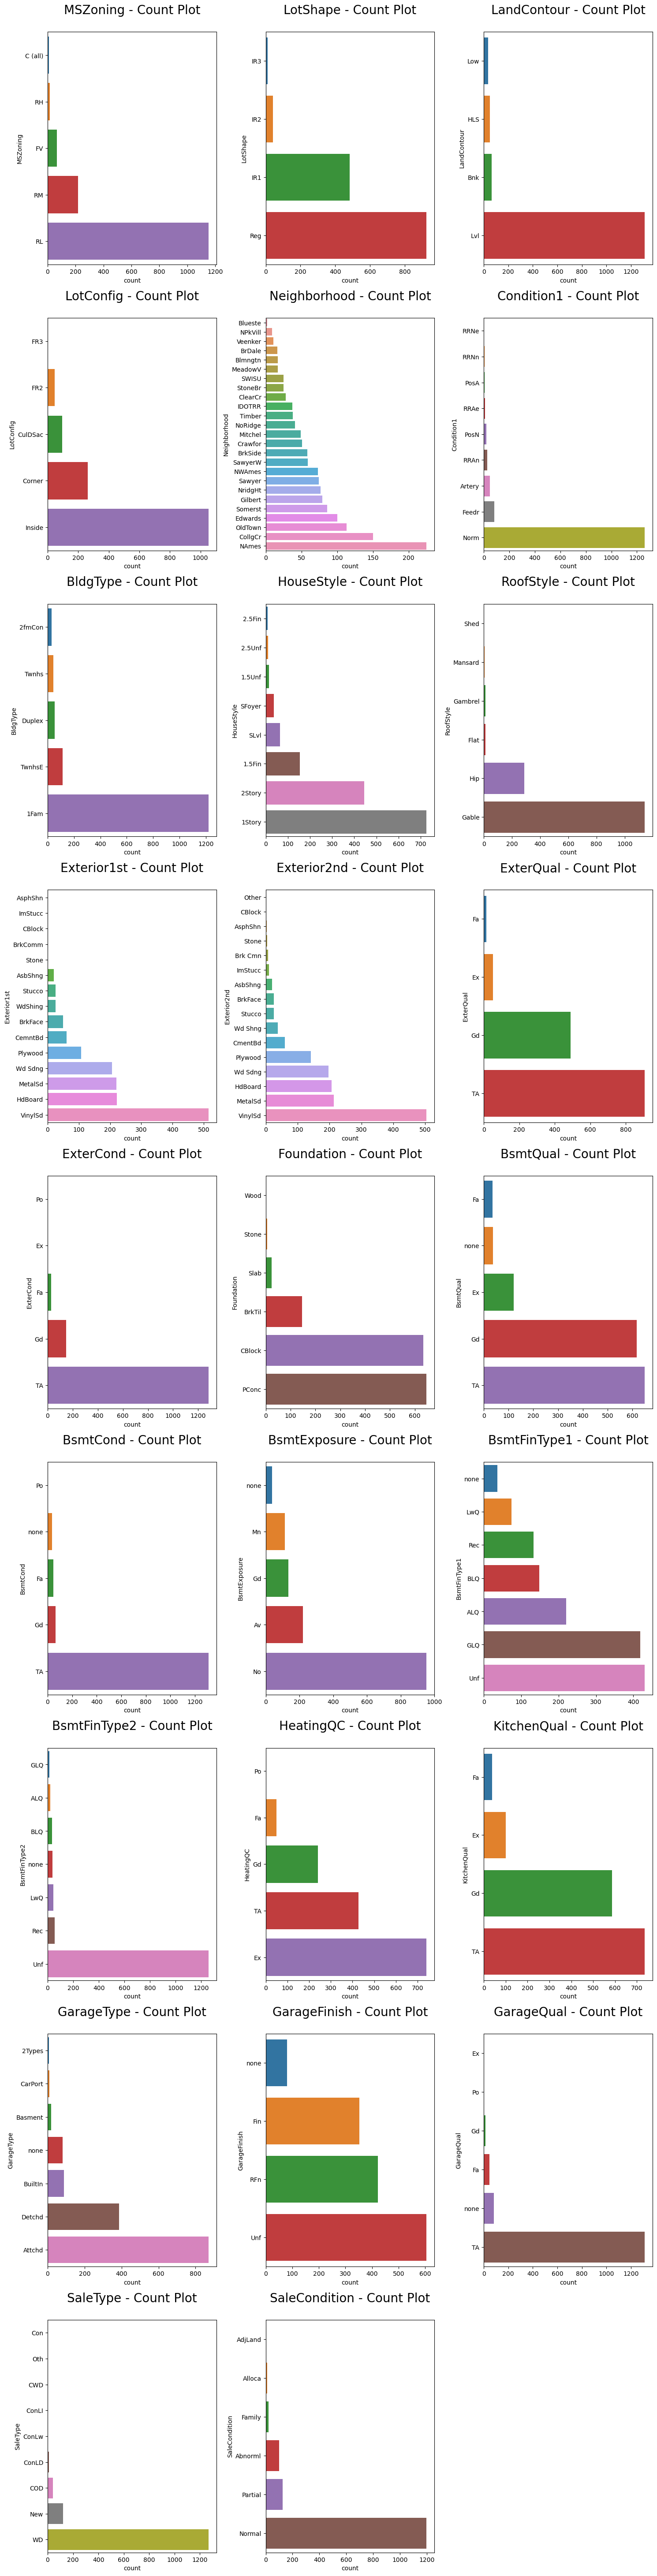

In [305]:
#Graph for Categorical Columns
plt.figure(figsize=(15,110))
columnCount=0
for i in Categorical_Columns_List:
    columnCount=columnCount+1
    plt.subplot(17,3,columnCount)
    sns.countplot(y=df_housingData[str(i)],order=df_housingData[str(i)].value_counts().sort_values().index)
    plt.title(str(i)+" - Count Plot\n",fontsize=20)
plt.tight_layout()
plt.show()

### Univariate Analysis for Numerical Columns

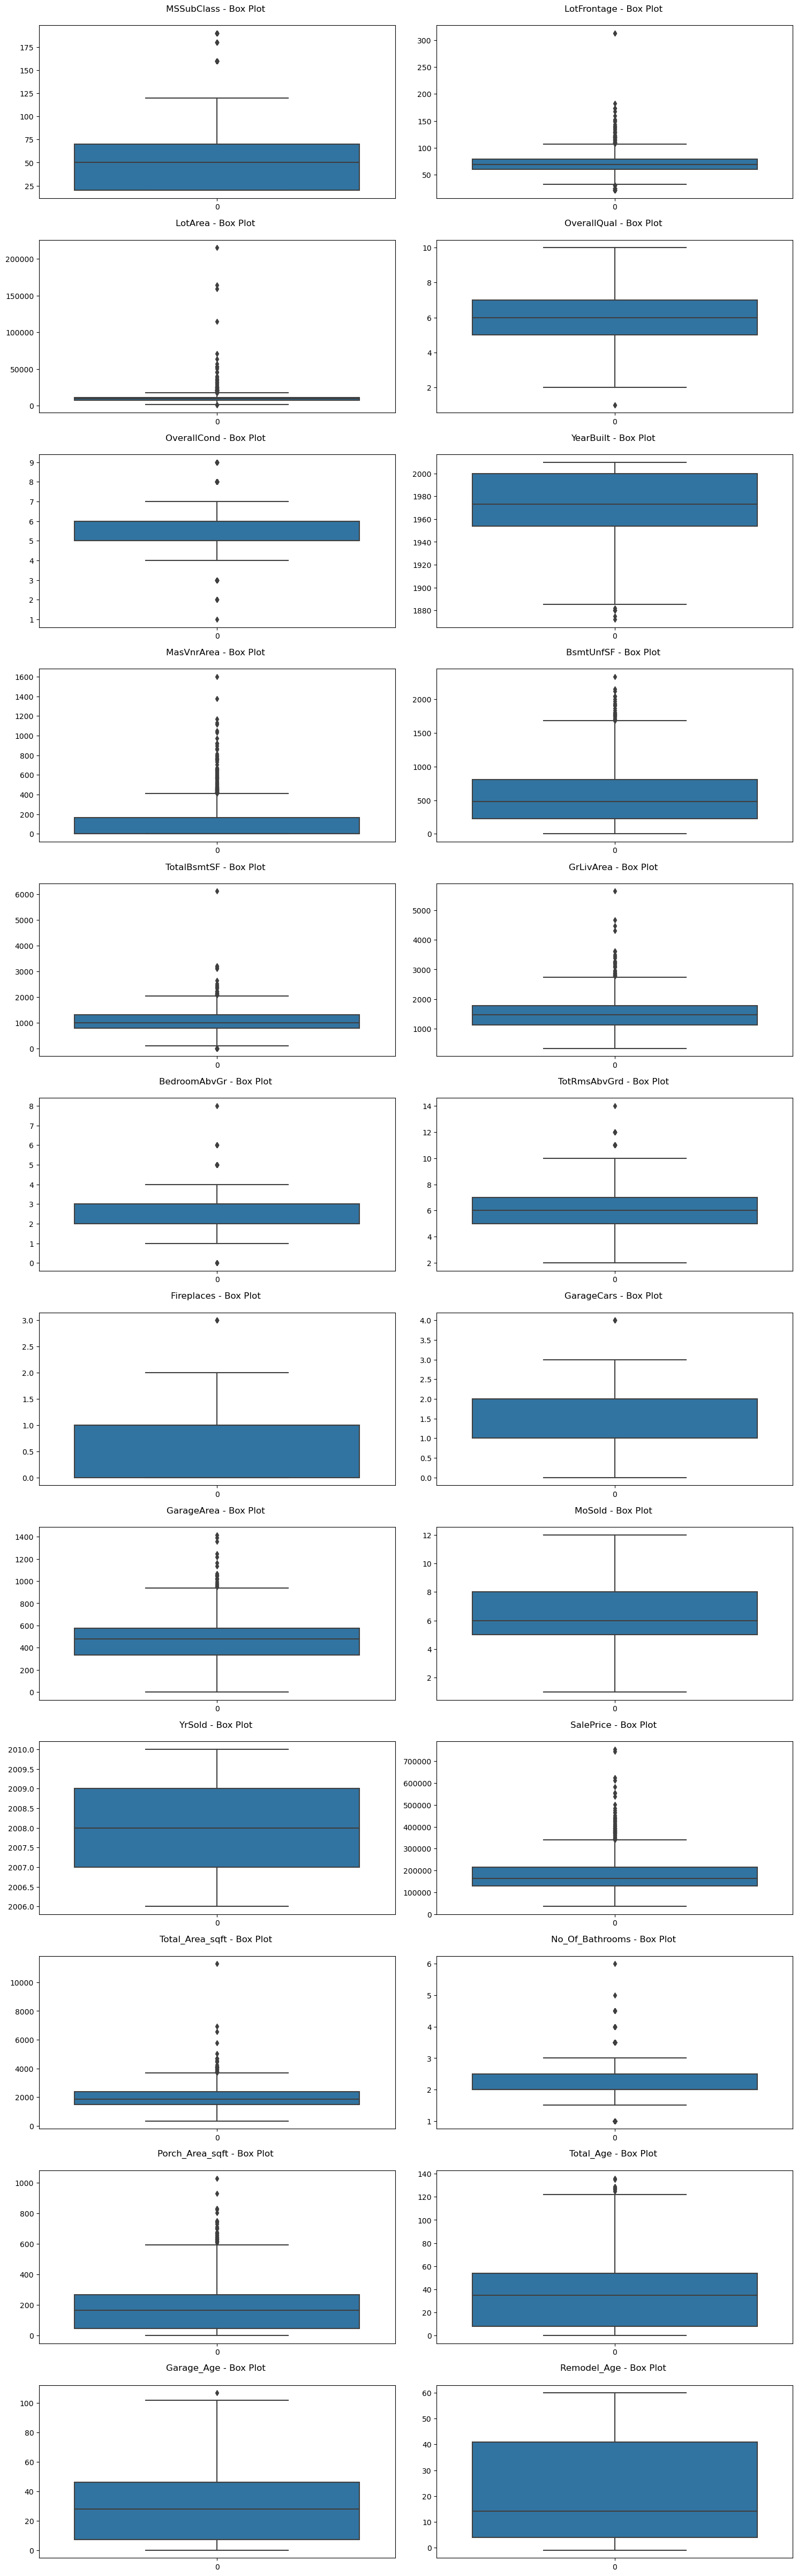

In [308]:
#Boxplot for Numerical Columns to analyze outliers
plt.figure(figsize=(15,100))#The size of the plot
columnCount=0
for i in Numerical_Columns_List:
    columnCount=columnCount+1
    plt.subplot(25,2,columnCount)
    plt.title(str(i)+" - Box Plot \n")
    sns.boxplot(df_housingData[str(i)])
plt.tight_layout()
plt.show()

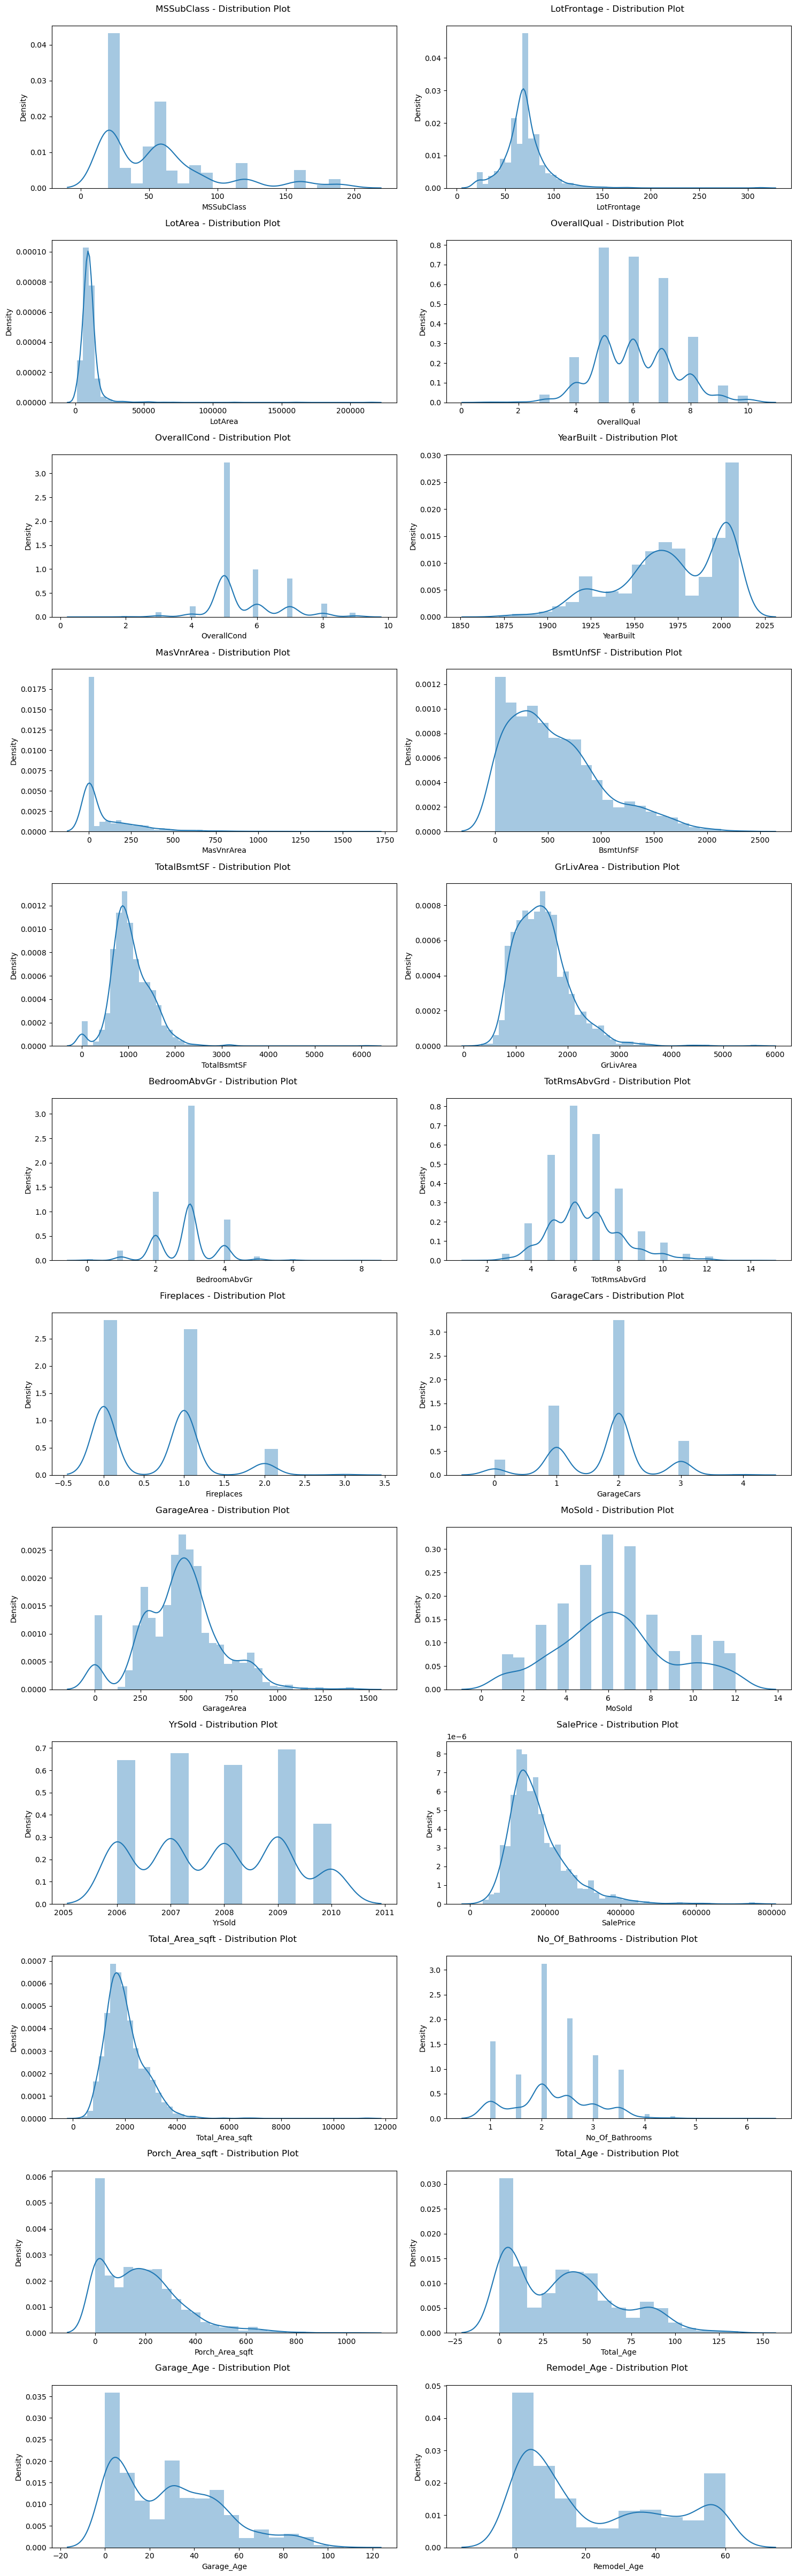

In [310]:
#Distribution Graph for Numerical Columns to analyze data Distribution
plt.figure(figsize=(15,100))#The size of the plot
columnCount=0
for i in Numerical_Columns_List:
    columnCount=columnCount+1
    plt.subplot(25,2,columnCount)
    plt.title(str(i)+" - Distribution Plot \n")
    sns.distplot(df_housingData[str(i)])
plt.tight_layout()
plt.show()

In [314]:
## Percentile Distribution of Numerical Data
df_housingData.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_Area_sqft,No_Of_Bathrooms,Porch_Area_sqft,Total_Age,Garage_Age,Remodel_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,103.117123,567.240411,1057.429452,1515.463699,...,472.980137,6.321918,2007.815753,180921.195890,1999.808219,2.210616,181.329452,36.547945,29.226712,22.950000
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,180.731373,441.866955,438.705324,525.480383,...,213.804841,2.703626,1.328095,79442.502883,773.992942,0.785399,156.656097,30.250152,24.034844,20.640653
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,1.000000,2006.000000,34900.000000,334.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,223.000000,795.750000,1129.500000,...,334.500000,5.000000,2007.000000,129975.000000,1493.000000,2.000000,45.000000,8.000000,7.000000,4.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,477.500000,991.500000,1464.000000,...,480.000000,6.000000,2008.000000,163000.000000,1863.500000,2.000000,164.000000,35.000000,28.000000,14.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,808.000000,1298.250000,1776.750000,...,576.000000,8.000000,2009.000000,214000.000000,2383.500000,2.500000,266.000000,54.000000,46.000000,41.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,335.000000,1232.000000,1602.200000,2158.300000,...,757.100000,10.000000,2010.000000,278000.000000,3023.100000,3.500000,382.000000,84.000000,61.000000,56.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,456.000000,1468.000000,1753.000000,2466.100000,...,850.100000,11.000000,2010.000000,326100.000000,3334.150000,3.500000,472.150000,91.000000,78.000000,58.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,791.280000,1797.050000,2155.050000,3123.480000,...,1002.790000,12.000000,2010.000000,442567.010000,4107.510000,4.000000,670.000000,110.410000,90.000000,60.000000


In [316]:
#With above data we can see there are Outliers. Let's remove data above 98 percentile to keep data valuable for analysis
Column_outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_Area_sqft','Porch_Area_sqft']
for i in Column_outlier:
    remove_quantile = df_housingData[i].quantile(0.98)
    df_housingData = df_housingData[df_housingData[i] < remove_quantile]

In [318]:
df_housingData.shape

(1290, 50)

## Bivariate Analysys

### Categorical Columns

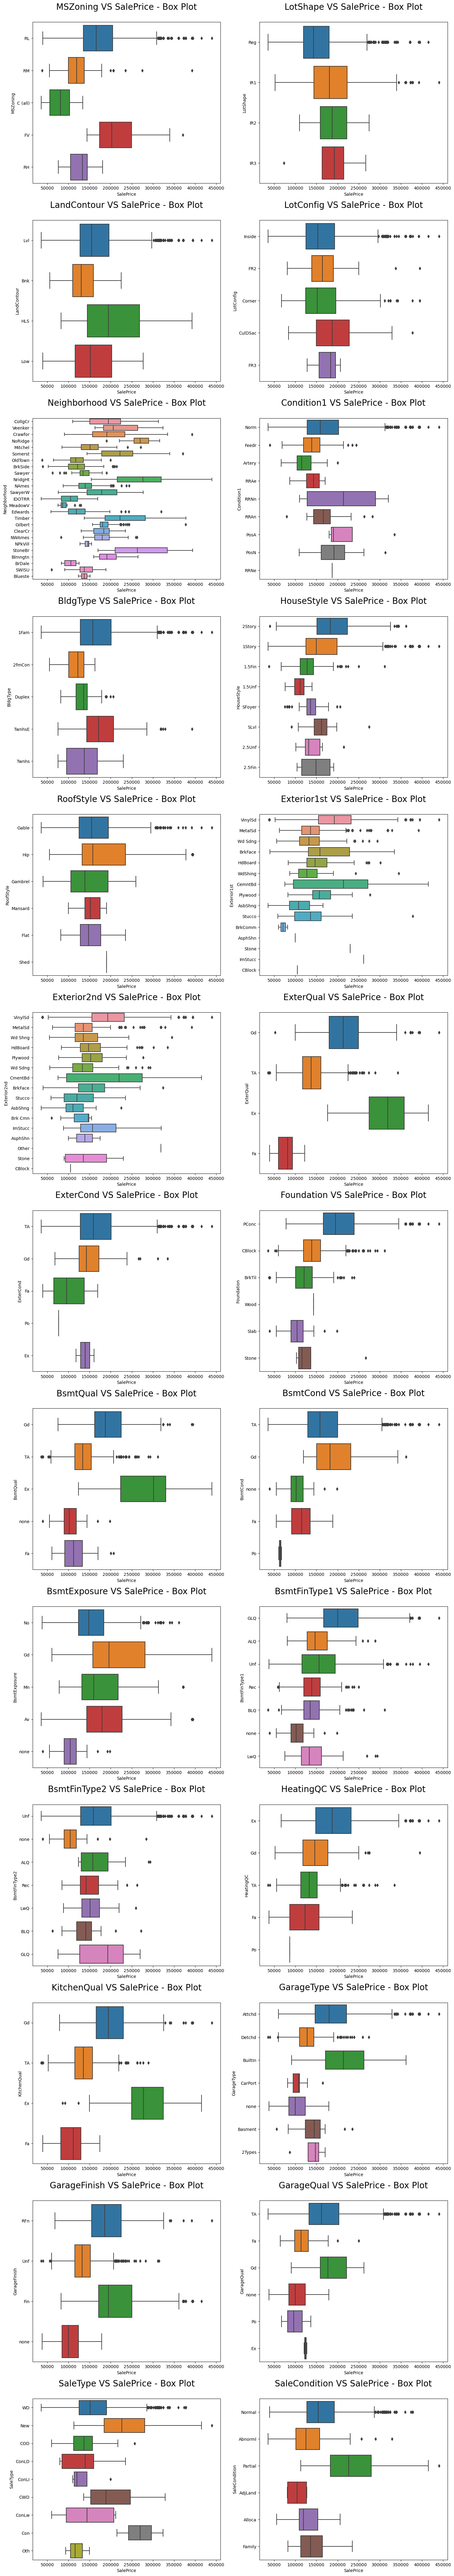

In [322]:
#Plotting SalePrice vs categorical columns
plt.figure(figsize=(15,110))
columnCount=0
for i in Categorical_Columns_List:
    columnCount=columnCount+1
    plt.subplot(17,2,columnCount)
    sns.boxplot(x = 'SalePrice', y = df_housingData[str(i)], data = df_housingData)
    plt.title(str(i)+" VS SalePrice - Box Plot\n",fontsize=20)  
plt.tight_layout()
plt.show()

In [331]:
df_housingData.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

ValueError: could not convert string to float: 'RL'